## Logistic regression

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = np.array([[22,0],
                [25,0],
                [47,1],
                [52,0],
                [46,1],
                [56,1],
                [55,0],
                [60,1],
                [62,1],
                [61,1],
                [18,0],
                [28,0],
                [27,0],
                [29,0],
                [49,1]]) 
df = pd.DataFrame(data, columns=['Age','Have_insurance'])
x=df['Age']
y=df['Have_insurance']

In [11]:
df

,Age,Have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


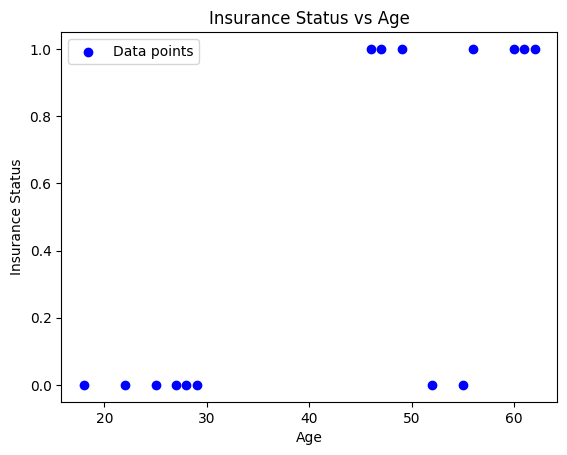

In [17]:

plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('Age')
plt.ylabel('Insurance Status')
plt.title('Insurance Status vs Age')
plt.legend()
plt.show()

In [18]:
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x * x)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2) 
c = (sum_y - m * sum_x) / n


In [19]:
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + c

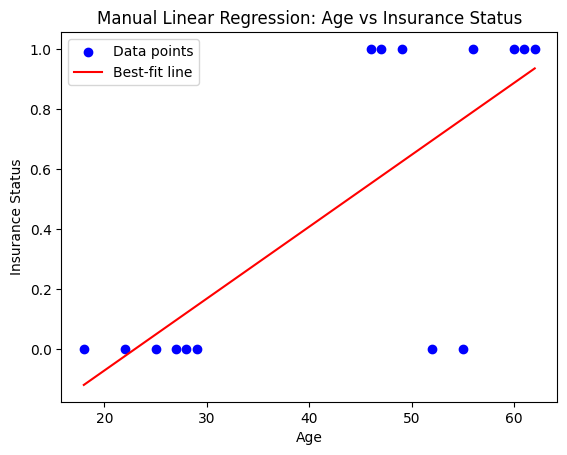

In [22]:
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_line, y_line, color='red', label='Best-fit line')
plt.xlabel('Age')
plt.ylabel('Insurance Status')
plt.title('Manual Linear Regression: Age vs Insurance Status')
plt.legend()
plt.show()

In [23]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

#### By using LogisticRegression class

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df.Have_insurance

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
Name: Have_insurance, dtype: int32

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age']],df["Have_insurance"],train_size=0.8)
X_test

,Age
1,25
6,55
14,49


In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
model.predict_proba(X_test)


array([[0.97913199, 0.02086801],
       [0.10243273, 0.89756727],
       [0.27553963, 0.72446037]])

In [57]:
model.score(X_test,y_test)

0.6666666666666666

c:\Users\atuld\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


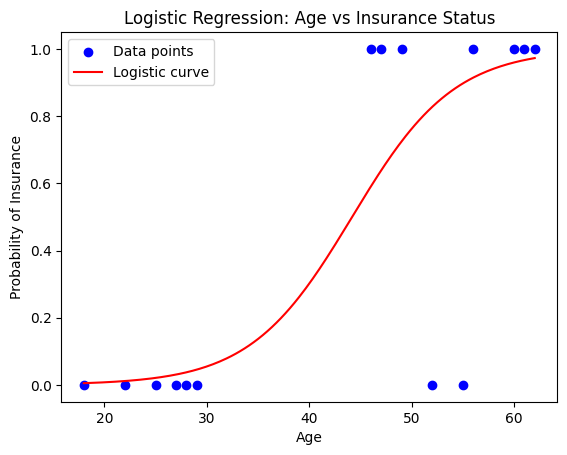

In [58]:
x_line = np.linspace(df['Age'].min(), df['Age'].max(), 200).reshape(-1, 1)
y_prob = model.predict_proba(x_line)[:, 1] 

# Plot
plt.scatter(df['Age'], y, color='blue', label='Data points')
plt.plot(x_line, y_prob, color='red', label='Logistic curve')
plt.xlabel('Age')
plt.ylabel('Probability of Insurance')
plt.title('Logistic Regression: Age vs Insurance Status')
plt.legend()
plt.show()

# # Check coefficients
# print("Intercept:", log_reg.intercept_)
# print("Coefficient:", log_reg.coef_)

#### using manual method

Estimated m (slope): 0.3429211191563819
Estimated c (intercept): -10.754221574216725


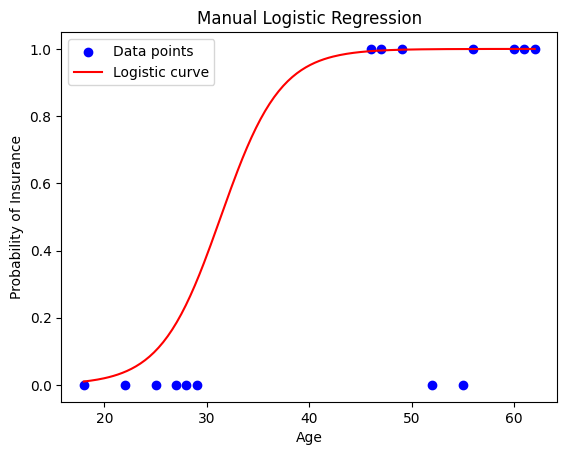

In [ ]:
m = 0.0
c = 0.0
lr = 0.001    
epochs = 20000

for _ in range(epochs):
    z = m * x + c
    p = 1 / (1 + np.exp(-z))    
    error = y - p
    dm = np.sum(error * x)
    dc = np.sum(error)
    m += lr * dm
    c += lr * dc

print("Estimated m (slope):", m)
print("Estimated c (intercept):", c)

x_line = np.linspace(x.min(), x.max(), 200)
p_line = 1 / (1 + np.exp(-(m * x_line + c)))

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_line, p_line, color='red', label='Logistic curve')
plt.xlabel('Age')
plt.ylabel('Probability of Insurance')
plt.title('Manual Logistic Regression')
plt.legend()
plt.show()